# Proyek Analisis Data: Customer
- **Nama:** Nabila Syaida Ramdani
- **Email:** nabila87611@gmail.com
- **ID Dicoding:** NabilaSyaidaRamdani

## Menentukan Pertanyaan Bisnis

- Kota mana yang memiliki jumlah pelanggan terbanyak berdasarkan (customer_city)?
- Dapatkah kita membuat grafik untuk menunjukkan jumlah pelanggan di setiap kota (customer city) dan negara bagian (customer_state)?

## Import Semua Packages/Library yang Digunakan

In [1]:
pip install scipy

# Mengimport Library yang dibutuhkan
* Pandas digunakan untuk manipulasi dan analisis data
* Numpy adalah library yang digunakan untuk komputasi numerik
* Scipy adalah extension dari numpy
* Matplotlib digunakan untuk visualisasi data, membuat berbagai jenis plot seperti bar char, scatter plot, histogram, dll.


In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

- Pandas digunakan untuk memanipulasi data
- numpu untuk operasi matematis dan manipulasi array
- scipy menyediakan fungsi tambahan untuk kalkulus ilmiah dan teknis
- matplotlib dan seaborn untuk membuat grafik dan plot yang menarik, memudahkan pemahaman data secara visual.

## Data Wrangling

In [3]:
data = pd.read_csv("/content/customer.csv", delimiter=",")
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


## Penjelasan Mengenai setiap kolom dari Data

* customer id: berisi ID unik pelanggan, setiap baris memiliki nilai yang berbeda dan unik untuk mengidentifikasi pelanggan secara individual
* Customer_unique_id: berisi ID unik pelanggan, namun mempresentasikan pelanggan yang unik di seluruh sistem atau platform.
* customer_zip_code_prefix: kolom ini menyimpan kode pos dari pelanggan, ini menunjukkan lokasi geografis tempat tinggal pelanggan.
* customer_city: berisi nama kota tempat pelanggan berada.
* customer_state: berisi kode provinsi atau negara bagian pelanggan, menggunakan singkatan dua huruf yang sesuai, misal
    - SP: Sao Paulo
    - CE: Ceara
    - RS: Rio Grande do Sul

### Gathering Data

In [4]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



Dataset yang diberikan berisi informasi mengenai pelanggan, termasuk ID pelanggan, ID unik, kode pos, kota, dan negara bagian tempat tinggal mereka. Dari data tersebut, terlihat bahwa semua pelanggan berasal dari negara bagian São Paulo (SP), dengan berbagai kota yang berbeda seperti Franca, São Bernardo do Campo, São Paulo, Mogi das Cruzes, dan Campinas.

In [5]:
data.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Data diambil melalui platform kaggle https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
- Jumlah total observasi 99441 baris dengan 5 kolom dan terdapat beberapa tipe dalam data tersebut diantaranya object dan integer, rata-rata dari semua nilai dalam kolom tersebut adalah 35.137, standar deviasi mengukur seberapa jauh nilai-nilai tersebut menyebar dari nilai rata-ratanya, data ini menunjukkan penyebaran sekitar 29.798.

### Assessing Data

In [6]:
data.nunique()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27


- Statistik yang diberikan menunjukkan jumlah entri untuk berbagai atribut dalam dataset pelanggan. Terdapat total 99.441 entri berdasarkan customer_id, dengan 96.096 entri unik untuk customer_unique_id, menandakan adanya beberapa pelanggan yang melakukan lebih dari satu transaksi.
- Pada kolom customer_zip_code_prefix, terdapat 14.994 kode pos yang berbeda, sementara jumlah kota yang tercatat adalah 4.119, dan terdapat 27 negara bagian.

In [7]:
data.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


**Insight:**
- Tidak adanya data yang null(kosong) , berarti data tersebut lengkap dan tidak adanya nilai yang hilang, dan tidak diperlukan teknik untuk mengatasi missing value.
- Dapat dilihat pada output di atas pada kolom customer_id 0 menunjukkan tidak adanya data yang hilang, dan seterusnya pada semua kolom

### Cleaning Data

In [8]:
data.duplicated().sum()

0

**Insight:**
- Menunjukkan tidak adanya data yang duplikat, mengindikasikan bahwa tidak ada entri duplikat dalam dataset. Ini berarti setiap baris dalam dataset adalah unik dan tidak ada dua baris yang memiliki nilai yang sama di semua kolom.

## Exploratory Data Analysis (EDA)

In [9]:
data.describe(include = "all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight:**
- Dapat dilihat konsentrasi pelanggan, banyak yang berasal dari kota Sao Paulo dan negara bagian SP.
- Sao Paulo adalah negara bagian yang memiliki frekuensi tertinggi, dengan 41476 pelanggan dapat dilihat pada customer_state.
- Dataset memiliki total 99.441 entri, di mana setiap customer_id adalah unik, menunjukkan bahwa tidak ada duplikat. Namun, terdapat 96.096 nilai unik customer_unique_id, yang berarti ada beberapa pelanggan yang memiliki lebih dari satu entri dalam dataset.

In [10]:
city = data.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
city

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


**Insight:**
- Kota Sao Paulo merupakan kota dengan jumlah pelanggan tertinggi, mencapai 15.540 entri, menunjukkan bahwa kota ini menjadi pusat aktivitas pelanggan. Diikuti oleh Rio de Janeiro dengan 6.882 pelanggan, dan Belo Horizonte dengan 2.773 pelanggan. Ini menunjukkan bahwa kota-kota besar di Brasil memiliki kontribusi signifikan terhadap total pelanggan dalam dataset.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Kota mana yang memiliki pelanggan terbanyak?

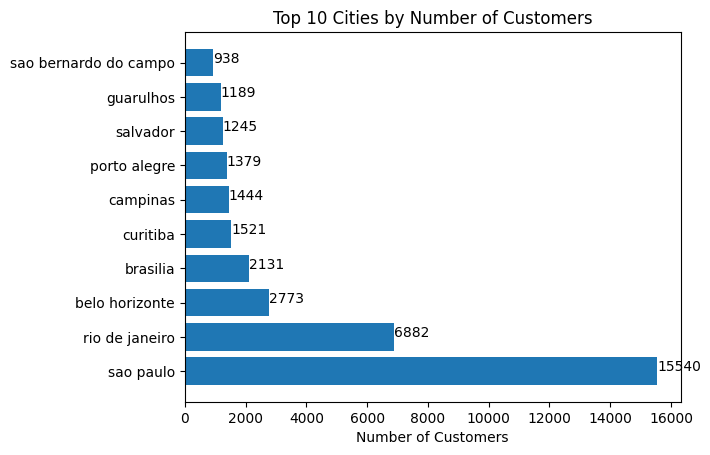

In [11]:
city_counts = data["customer_city"].value_counts().head(10)
plt.barh(city_counts.index, city_counts.values)
plt.xlabel("Number of Customers")
plt.title("Top 10 Cities by Number of Customers")

for index, value in enumerate(city_counts.values):
  plt.text(value, index, str(value))
plt.show()

- Dapat dilihat dari bar chart di atas menunjukkan bahwa pelanggan terbanyak adalah kota Sao Paulo dengan 15540 pelanggan. Menunjukkan bahwa Sao Paulo adalah pusat aktivitas pelanggan yang signifikan dalam dataset.

- Setelah Sao Paulo, kota dengan jumlah pelanggan tertinggi adalah Rio De Janeiro dengan 6.882 pelanggan, diikuti oleh Belo Horizonte dengan 2.773. Kota-kota lin seperti Brasilia, Curitiba, dan Campinas juga menunjukkan jumlah yang jauh lebih rendah dibandingkan dengan Sao Paulo dan Rio de Janeiro Kota-kota seperti Sao Bernardo do Campo, Guarulhos, Salvador, dan Porto Alegre memiliki jumlah pelanggan yang relatif kecil, masing-masing di bawah 1.500.

- Konsentrasi pelanggan yang tinggi di Sao Paulo dan Rio de Janeiro dapat menjadi target utama untuk strategi pemasaran dan pengembangan produk. Sebaliknya, kota-kota dengan jumlah pelanggan lebih sedikit mungkin membutuhkan pendekatan yang berbeda untuk meningkatkan basis pelanggan mereka.

### Pertanyaan 2:

Dapatkah kita membuat grafik untuk menunjukkan jumlah pelanggan di setiap kota (customer city) dan negara bagian (customer_state)?

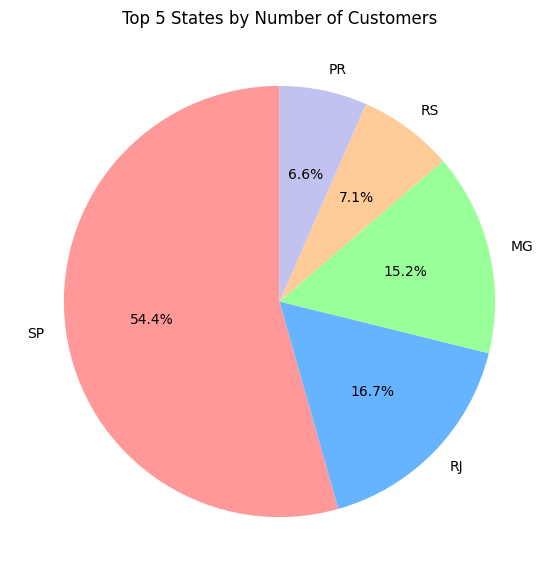

In [12]:
state_counts = data["customer_state"].value_counts().head(5)
plt.figure(figsize=(7, 7))
plt.pie(state_counts.values, labels=state_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

plt.title("Top 5 States by Number of Customers")
plt.show()


 **Insight:**
- Negara SP dengan jumlah pelanggan terbanyak mencakup 54.4% dari total pelanggan, negara bagian kedua terbanyak yaitu RJ dengan nilai 16.7%, negara ketiga terbanyak yaitu MG dengan nilai 15.2%.

- Distribusi pelanggan yang sangat terfokus di São Paulo menunjukkan perlunya strategi yang diperhitungkan untuk meningkatkan pangsa pasar di negara bagian lain.

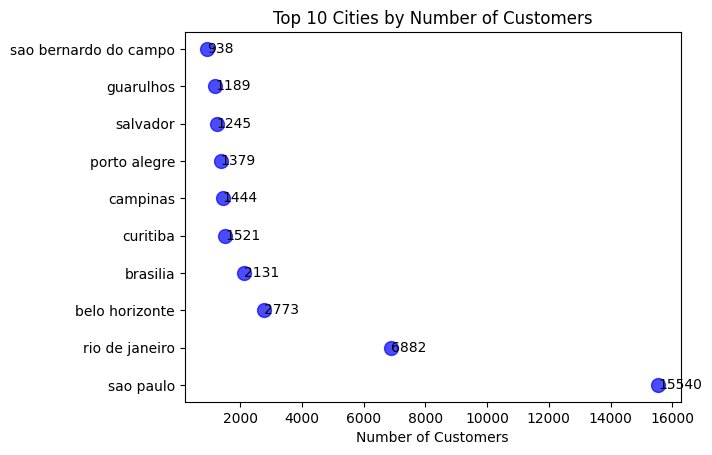

In [13]:
city_counts = data["customer_city"].value_counts().head(10)  # 10 kota teratas
plt.scatter(city_counts.values, city_counts.index, color='blue', s=100, alpha=0.7)
plt.xlabel("Number of Customers")
plt.title("Top 10 Cities by Number of Customers")
for index, value in enumerate(city_counts.values):
    plt.text(value, index, str(value), va='center')
plt.show()

* Sumbu Y menampilkan nama-nama 10 kota dengan jumlah pelanggan terbanyak, seperti Sao Paulo, Rio de Janeiro, Belo Horizonte, Brasilia, Curitiba dst.
* Sumbu X menunjukkan jumlah pelanggan di setiap kota, Sao Paulo memiliki 15.540 pelanggan, sementara Sao bernado memiliki 938 pelanggan.

## Analisis Lanjutan (Opsional)

In [14]:
unique_cities = set(data["customer_city"])
print(unique_cities)


{'santo cristo', 'sao lourenco da serra', 'alem paraiba', 'sao joaquim de bicas', 'araras', 'tomar do geru', 'jaru', 'orizona', 'piratuba', 'avelar', 'novo gama', 'jaraguari', 'virginia', 'capitolio', 'garca', 'itarantim', 'ataleia', 'santa fe', 'sao bras', 'campo florido', 'pedro velho', 'vanini', 'acajutiba', 'cajueiro', 'carlinda', 'godoy moreira', 'roseira', 'porecatu', 'amapora', 'alto santo', 'igaratinga', 'francisco santos', 'angustura', 'santo antonio do monte', 'campo ere', 'vargem', 'morro do chapeu', 'santo antonio das missoes', 'floresta do araguaia', 'agua doce', 'afranio', 'saudade do iguacu', 'baldim', 'rio acima', 'feira de santana', 'maragogi', 'pureza', 'areial', 'santa cecilia', 'ibicuitinga', 'termas de ibira', 'fundao', 'morro vermelho', 'regente feijo', 'rio grande do piaui', 'engenheiro passos', 'lapa', 'lavinia', 'uniao dos palmares', 'divinopolis do tocantins', 'tacuru', 'sao joao evangelista', 'santana do mundau', 'oliveira dos brejinhos', 'sertania', 'quatitu

In [15]:
unique_state = set(data["customer_state"])
print(unique_state)

{'RO', 'MA', 'ES', 'RR', 'AL', 'DF', 'MG', 'PR', 'TO', 'AM', 'SC', 'CE', 'PE', 'MS', 'PI', 'RJ', 'AC', 'AP', 'SP', 'PB', 'GO', 'PA', 'MT', 'RN', 'RS', 'SE', 'BA'}


# RFM Analysis, Geoanalysis, dan Clustering

#### VISUALIZATION & EXPLANATORY ANALYSIS

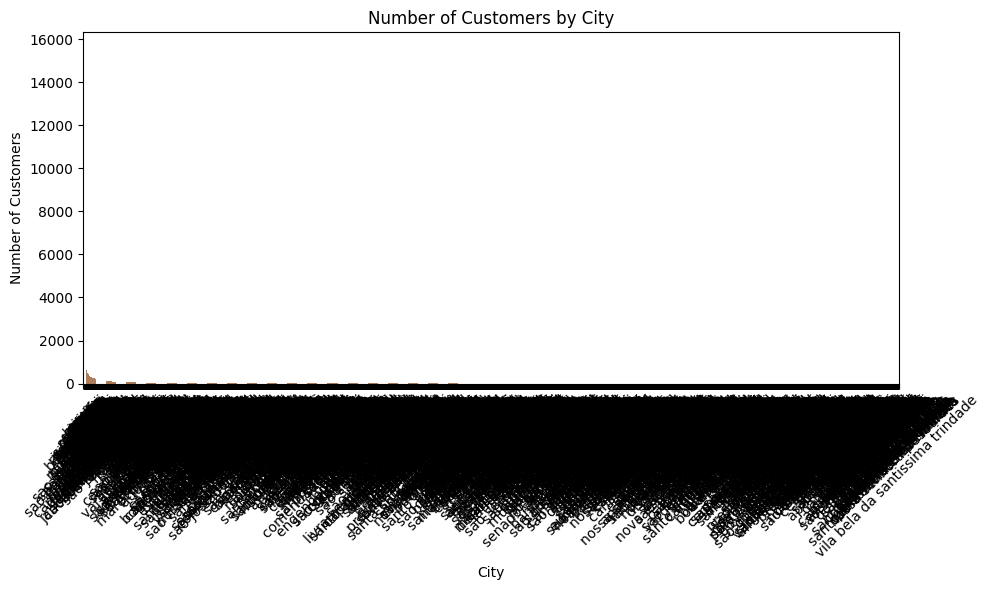

In [16]:
df = pd.DataFrame(data)
city_counts = df['customer_city'].value_counts()
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='saddlebrown', alpha=0.7)
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Kota Sao Paulo memiliki jumlah pelanggan terbanyak, ini menunjukkan bahwa Sao Paulo mungkin menjadi pasar utama atau lokasi konsentrasi pelanggan yang lebih tinggi dibandingkan dengan kota lainnya dalam dataset ini.
- kota-kota lain seperti Mogi das Cruzes, Campinas, Taboao da Serra, Fortaleza, Canoass, dan Cotia memiliki jumlah pelanggan yang seimbang, ini menunjukkan bahwa meskipun ada variasi dalam jumlah, pelanggan tersebar di berbagai kota.


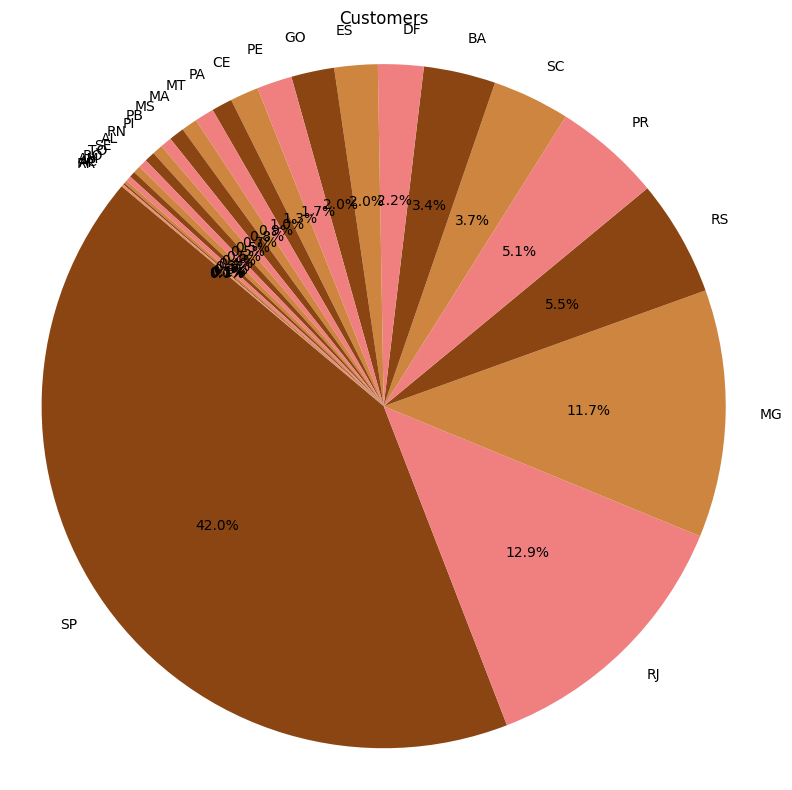

In [17]:
df = pd.DataFrame(data)
state_counts = df['customer_state'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140, colors=['saddlebrown', 'lightcoral', 'peru'])
plt.axis('equal')
plt.title('Customers')
plt.tight_layout()
plt.show()


- Dari visualisasi, terlihat bahwa sebagian besar pelanggan berada di negara bagian Sao Paulo yang mencakup hampir seluruh bagian pie chart. Menunjukkan bahwa Sao Paulo merupakan pasar utama bagi perusahaan.
- Selain Sao Paulo, terdapat juga pelanggan dari negara bagian lain seperti Ceara dan Rio Grande do Sul. Meskipun jumlah pelanggan di kedua negara bagian ini relatif kecil dibandingkan dengan SP, keberadaan mereka menunjukkan bahwa perusahaan memiliki jangkauan yang lebih luas.

In [18]:
import pickle

In [19]:
# Menyimpan hasil clustering atau dataset hasil analisis sebagai model
model = data[['customer_id', 'customer_city', 'customer_state']]  # Ubah ini sesuai kolom yang ingin disimpan


In [20]:
# Menyimpan model ke file
filename = 'CustomerData_model.sav'
pickle.dump(model, open(filename, 'wb'))

## Conclusion

### Pertanyaan 1:
Kota mana yang memiliki pelanggan terbanyak?


- Dari data customer yang berisi 99441 baris dengan 5 kolom, dapat dilihat terdapat 5 kota diantaranya sao bernardo do campo, franca, sao paulo, mogi das cruzes, dan campinas. Kota yang memiliki pelanggan terbanyak yaitu kota Sao Paulo yaitu sebanyak 15540 pelanggan.


### Pertanyaan 2:

Dapatkah kita membuat grafik untuk menunjukkan jumlah pelanggan di setiap kota (customer city) dan negara bagian (customer_state)?


- Kita dapat menampilkan data jumlah pelanggan di kota dan negara bagian dalam grafik batang terpisah.

- Dapat juga menggunakan pie chart untuk memudahkan melihat distribusi pelanggan berdasarkan negara.